In [153]:
import sys
sys.path.append("/projects/PyXTBClient/") # go to parent dir
import client.xtb_client as xtb_client
import client.constants as xtb_constants
import yaml
from datetime import datetime
import pandas as pd

In [155]:
client = xtb_client.XTBClient(host='xapi.xtb.com', port=5112, stream_port=5113)

In [156]:
used_id = ''
password = ''
with open('../configuration/config.yml') as file:
    user_yml = yaml.safe_load(file)
    used_id = user_yml['user_id']
    password = user_yml['password']

client.login(user_id, password)

{'status': True,
 'streamSessionId': '262540fffee58c68-0000501c-000b9b4e-cba73c5752b43c01-3012f39b'}

In [93]:
#symbols = client.get_all_symbols()
#for i in symbols: 
#    print(i.leverage)

In [149]:
#spy = client.getSymbol('US500')

In [150]:
#balance = client.get_balance()

In [197]:
start = datetime.timestamp(datetime(2020, 1, 18, 0, 0, 0))*1000
end = datetime.timestamp(datetime(2020, 3, 21, 0, 0, 0))*1000
data = client.get_chart_range_request(symbol='US500', start=start, end=end, period=xtb_constants.Period.h1)

In [198]:
df = pd.DataFrame(columns=["open", "close", "high", "low", "datetime"])
for i in data:
    df = df.append({'open': i.open, 'close': i.close, 'high': i.high, 'low': i.low
                , 'datetime': i.ctm/1000.
      }, ignore_index=True)
df['datetime'] = pd.to_datetime(df['datetime'], unit='s')
df.set_index(keys='datetime', inplace=True)

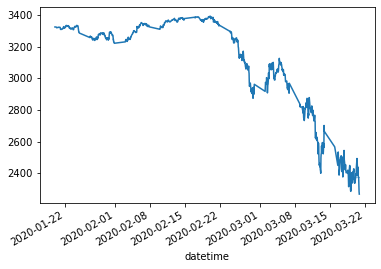

In [199]:
df['close'].plot()

In [188]:
data

[{'open': 3305.1, 'close': 3305.8, 'high': 3306.5, 'low': 3304.8, 'digits': 1, 'symbol': 'US500', 'ctm': 1582499100000, 'ctm_string': 'Feb 24, 2020 12:05:00 AM', 'volume': 0.0},
 {'open': 3305.8, 'close': 3304.2, 'high': 3306.5, 'low': 3303.1, 'digits': 1, 'symbol': 'US500', 'ctm': 1582499160000, 'ctm_string': 'Feb 24, 2020 12:06:00 AM', 'volume': 0.0},
 {'open': 3304.1, 'close': 3303.7, 'high': 3306.4, 'low': 3303.3, 'digits': 1, 'symbol': 'US500', 'ctm': 1582499220000, 'ctm_string': 'Feb 24, 2020 12:07:00 AM', 'volume': 0.0},
 {'open': 3304.1, 'close': 3302.2, 'high': 3304.5, 'low': 3302.0, 'digits': 1, 'symbol': 'US500', 'ctm': 1582499280000, 'ctm_string': 'Feb 24, 2020 12:08:00 AM', 'volume': 0.0},
 {'open': 3302.2, 'close': 3297.0, 'high': 3302.5, 'low': 3296.8, 'digits': 1, 'symbol': 'US500', 'ctm': 1582499340000, 'ctm_string': 'Feb 24, 2020 12:09:00 AM', 'volume': 0.0},
 {'open': 3297.6, 'close': 3296.9, 'high': 3299.6, 'low': 3296.6, 'digits': 1, 'symbol': 'US500', 'ctm': 15824